### Simple plot comparing baseflow recordings vs storms for ESS PI 2025 poster 

In [1]:
import os
import re
import numpy as np
import scipy.signal
import librosa
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_left_signals = []
all_right_signals = []

baseflow_path = '../H1/st2/raspberrypi_080322-153100.flac'
storm_path = '../H1/st2/raspberrypi_080322-144600.flac'

# first for baseflow
baseflow_signal, sr = librosa.load(baseflow_path, sr=None, mono=False)
all_left_signals.append(baseflow_signal[0])
all_right_signals.append(baseflow_signal[1])
# then for the storm
storm_signal, sr = librosa.load(storm_path, sr=None, mono=False)
all_left_signals.append(storm_signal[0])
all_right_signals.append(storm_signal[1])

left_min = np.min(np.concatenate(all_left_signals))
left_max = np.max(np.concatenate(all_left_signals))
right_min = np.min(np.concatenate(all_right_signals))
right_max = np.max(np.concatenate(all_right_signals))

# create time axis
baseflow_duration = baseflow_signal.shape[-1] / sr
baseflow_time = np.linspace(0, baseflow_duration, baseflow_signal.shape[-1])
storm_duration = storm_signal.shape[-1] / sr
storm_time = np.linspace(0, storm_duration, storm_signal.shape[-1])

Baseflow

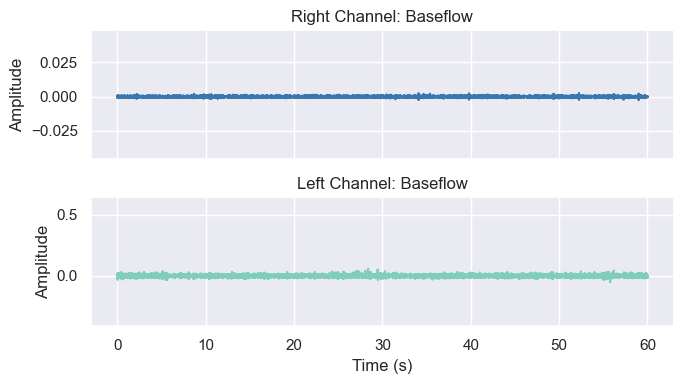

In [15]:
# plot - baseflow first
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(7, 4), sharex=True)
# plot Right Channel (top)
axes[0].plot(baseflow_time, baseflow_signal[1], label='Right Channel', color='#2469A6', alpha=0.9)
axes[0].set_title(f"Right Channel: Baseflow")
axes[0].set_ylabel("Amplitude")
# plot Left Channel (bottom)
axes[1].plot(baseflow_time, baseflow_signal[0], label='Left Channel', color='#7FCDBB')
axes[1].set_title(f"Left Channel: Baseflow")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Amplitude")
# set consistent Y-axis limits
axes[0].set_ylim([right_min, right_max])  # Right channel
axes[1].set_ylim([left_min, left_max])  # Left channel

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("baseflow_poster_example.jpeg", dpi=600)
plt.show()

Storm

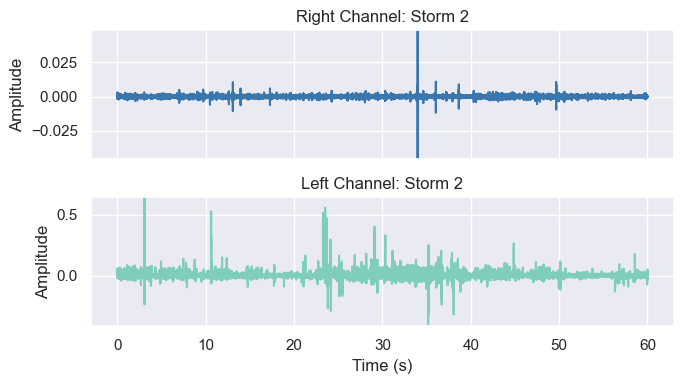

In [ ]:
# plot - storm 2
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(7,4), sharex=True)
# plot Right Channel (top)
axes[0].plot(storm_time, storm_signal[1], label='Right Channel', color='#2469A6', alpha=0.9)
axes[0].set_title(f"Right Channel: Storm 2")
axes[0].set_ylabel("Amplitude")
# plot Left Channel (bottom)
axes[1].plot(storm_time, storm_signal[0], label='Left Channel', color='#7FCDBB')
axes[1].set_title(f"Left Channel: Storm 2")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Amplitude")
# set consistent Y-axis limits
axes[0].set_ylim([right_min, right_max])  # Right channel
axes[1].set_ylim([left_min, left_max])  # Left channel

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("storm_poster_example.jpeg", dpi=600)
plt.show()

Both

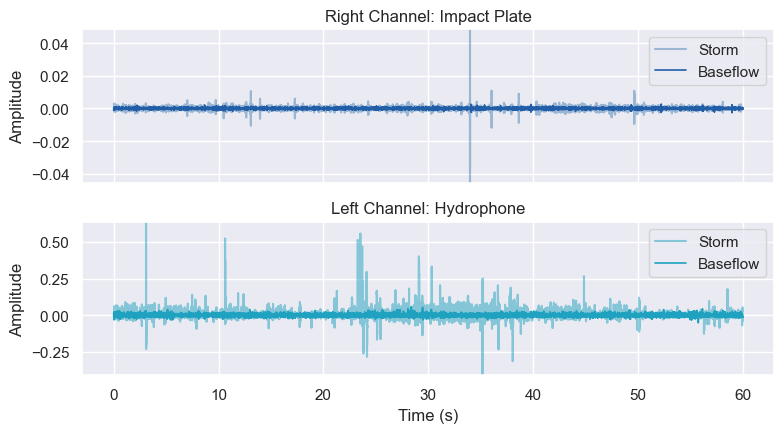

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(8, 4.5), sharex=True)

# --- RIGHT CHANNEL (top subplot) ---
# Plot storm signal first (background)
axes[0].plot(storm_time, storm_signal[1], label='Storm', color='#2469A6', alpha=0.4, linewidth=1.5)
# Plot baseflow signal on top
axes[0].plot(baseflow_time, baseflow_signal[1], label='Baseflow', color='#225EA8', alpha=1.0, linewidth=1.2)
axes[0].set_title("Right Channel: Impact Plate")
axes[0].set_ylabel("Amplitude")
axes[0].legend(loc='upper right')

# --- LEFT CHANNEL (bottom subplot) ---
# Plot storm signal first (background)
axes[1].plot(storm_time, storm_signal[0], label='Storm', color='#1FA2BF', alpha=0.5, linewidth=1.5)
# Plot baseflow signal on top
axes[1].plot(baseflow_time, baseflow_signal[0], label='Baseflow', color='#1FA2BF', alpha=1.0, linewidth=1.2)
axes[1].set_title("Left Channel: Hydrophone")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Amplitude")
axes[1].legend(loc='upper right')

# Set consistent Y-axis limits for better comparison
axes[0].set_ylim([right_min, right_max])
axes[1].set_ylim([left_min, left_max])

# Layout & Save
plt.tight_layout()
plt.savefig("storm_vs_baseflow_poster_example.jpeg", dpi=600)
plt.show()
